# Proyecto del Día 12 - Análisis y Clasificación de Clientes

Bienvenido al **Proyecto del Día 12**. Lee atentamente la consigna *¡y a programar!*


### Título: Análisis y Clasificación de Clientes para Campañas de Marketing

En este proyecto, vas a aplicar técnicas avanzadas de análisis de datos para resolver un problema de clasificación de clientes en un conjunto de datos simulado.

El objetivo es identificar distintos segmentos de clientes basados en sus comportamientos de compra y características demográficas para diseñar campañas de marketing más efectivas.


### Descripción del Proyecto

Este proyecto tiene como objetivo utilizar técnicas de análisis de datos y aprendizaje automático para identificar diferentes segmentos de clientes basados en sus comportamientos de compra y características demográficas. Esto te permitirá desarrollar estrategias de marketing dirigidas y personalizadas. Vas a aplicar métodos de preprocesamiento de datos, reducción de dimensiones, y técnicas de clustering para analizar un conjunto de datos simulado de clientes.


### Datos

Vas a utilizar un dataset simulado llamado `datos_clientes.csv` que te descargarás en los recursos de esta lección, y que contiene información demográfica y de comportamiento de compra de clientes, como la edad, los ingresos anuales, la puntuación de gasto y la categoría de producto favorito.


### Consigna del Proyecto

1. **Preprocesamiento de Datos**: Cargar, limpiar y preparar el dataset para el análisis. Esto incluye la normalización de los datos para asegurar que las técnicas de reducción de dimensiones y clustering funcionen correctamente.
2. **Reducción de Dimensiones**: Utilizar **PCA** y **SVD** para reducir la cantidad de variables y destacar las características más importantes que influyen en el comportamiento del cliente.
3. **Clustering**: Implementar **K-Means** y **Clustering Jerárquico** para segmentar los clientes en grupos basados en similitudes en sus datos. Esto ayudará a identificar patrones y tendencias entre diferentes tipos de clientes.
4. **Visualización de Datos**: Crear visualizaciones para interpretar los resultados de las técnicas de reducción de dimensiones y clustering. Esto incluye la creación de **gráficos de dispersión** para los resultados de PCA y la visualización de **dendrogramas** para el Clustering Jerárquico.
5. **Interpretación y Estrategias de Marketing**: Analizar los clusters obtenidos y desarrollar propuestas de estrategias de marketing específicas para cada segmento de clientes. Deberás justificar tus estrategias basándote en las características y comportamientos de los grupos identificados.

¡Mucha suerte, y que te diviertas!

## Análisis y Clasificación de Clientes para Campañas de Marketing

### 1. Preprocesamiento de Datos

In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Cargar los datos
df = pd.read_csv("customer_data.csv")

In [4]:
# Ver información básica del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID Cliente                      200 non-null    int64 
 1   Edad                            200 non-null    int64 
 2   Ingresos Anuales (k$)           200 non-null    int64 
 3   Puntuación de Gasto (1-100)     200 non-null    int64 
 4   Categoría de Producto Favorito  200 non-null    object
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.head()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría de Producto Favorito
0,1,56,89,47,Libros
1,2,69,91,86,Hogar
2,3,46,46,23,Electrónica
3,4,32,28,66,Libros
4,5,60,81,27,Electrónica


In [5]:
# Ver la descripción de las estadísticas básicas del dataset
df.describe()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100)
count,200.000000,200.00000,200.000000,200.000000
mean,100.500000,43.42500,69.580000,49.910000
std,57.879185,14.94191,29.693808,29.409292
min,1.000000,18.00000,20.000000,1.000000
25%,50.750000,31.00000,43.750000,24.000000
50%,100.500000,43.50000,69.500000,50.000000
75%,150.250000,56.00000,92.500000,74.000000
max,200.000000,69.00000,119.000000,99.000000


In [6]:
# Normalizar los datos
X = df.iloc[:,1:4]
X

,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100)
0,56,89,47
1,69,91,86
2,46,46,23
3,32,28,66
4,60,81,27
...,...,...,...
195,69,77,99
196,30,86,36
197,58,65,82
198,20,43,96


### 2. Reducción de Dimensiones: PCA y SVD

In [80]:
# Aplicar PCA paso 1 normalizar los datos
escala = MinMaxScaler(feature_range=(0,1))
X_nor = escala.fit_transform(X)

In [8]:
# Aplicar PCA paso 2 obtener la matriz de covarianza y los eigvec, eigvals
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_nor)

In [9]:
# Aplicar SVD
# Utilizando el DF normalizado (X_nor) obtenido para el PCA
U, sigma, VT = np.linalg.svd(X_nor)

In [10]:
# Seleccionar los dos primeros componentes singulares para reducción de dimensiones
k = 2 # 2 primeros componentes
X_svd = U[:,:k]*sigma[:k]

### 3. Clustering: K-Means y Clustering Jerárquico

In [76]:
# Aplicar K-Means a los datos normalizados
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_nor)
etiquetas = kmeans.labels_

# Aplicar K-Means al PCA
kmeans_clusters_pca = kmeans.fit(X_pca)
centroides = kmeans_clusters_pca.cluster_centers_

C:\Users\Ferna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ferna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
# Aplicar Clustering Jerárquico
linked = linkage(X_nor,'ward')

### 4. Visualización de Datos

Text(0, 0.5, 'PC 2')

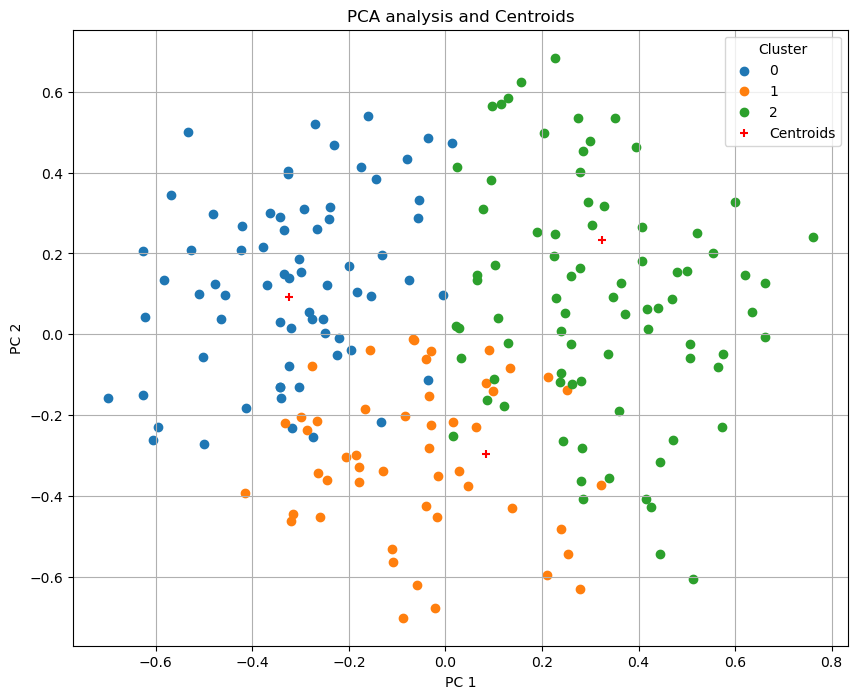

In [70]:
# Crear un gráfico de dispersión para los resultados de PCA
plt.figure(figsize=(10,8))
for i in range(0,3):
    plt.scatter(X_pca[etiquetas==i, 0], X_pca[etiquetas==i, 1],label=i)

plt.scatter(centroides[:,0],centroides[:,1],c = "red", marker = "+", label="Centroids")
plt.legend(title = "Cluster")
plt.grid(True)
plt.title("PCA analysis and Centroids")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

Text(0, 0.5, 'Ward distance')

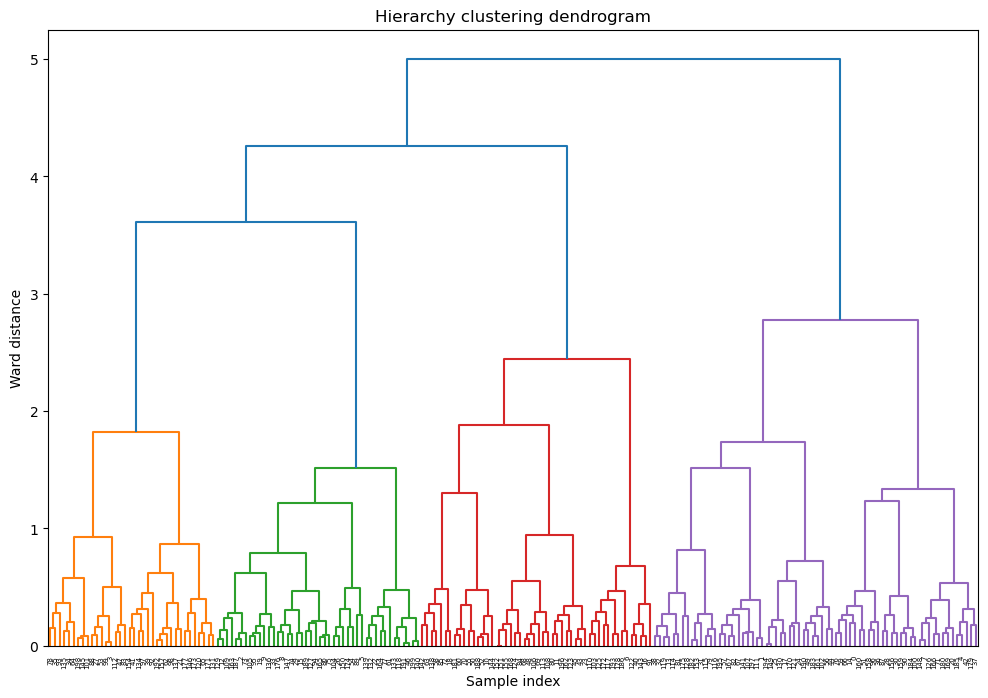

In [31]:
# Crear un dendrograma del clústering jerárquico
plt.figure(figsize=(12,8))
dendrogram(linked,
           orientation = "top",
           distance_sort = "descending",
           show_leaf_counts = True)
plt.title("Hierarchy clustering dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Ward distance")

### 5. Interpretación y Estrategias de Marketing basadas en los Clusters

In [78]:
# Escribe un loop que te permita mostrar los datos básicos de los diferentes clusters, como:
## su edad media
## sus ingresos medios
## su puntuación de gastos media
cluster_info = pd.DataFrame({
    "Cluster": kmeans_clusters,
    "Edad": df["Edad"],
    "Ingresos Anuales (k$)": df["Ingresos Anuales (k$)"],
    "Puntuación de Gasto (1-100)": df["Puntuación de Gasto (1-100)"]
    })

edad_x = [];
ingresos_x = [];
puntuacion_x = [];
for cluster in cluster_info["Cluster"].unique():
    cluster_data = cluster_info[cluster_info['Cluster'] == cluster]
    edad_x.append(cluster_data["Edad"].mean())
    ingresos_x.append(cluster_data["Ingresos Anuales (k$)"].mean())
    puntuacion_x.append(cluster_data["Puntuación de Gasto (1-100)"].mean())
    print(f"Cluster: {cluster}")
    print(f"  - Mean age: {cluster_data["Edad"].mean():.0f}")
    print(f"  - Mean annual income: {cluster_data["Ingresos Anuales (k$)"].mean():.2f}")
    print(f"  - Mean expense score: {cluster_data["Puntuación de Gasto (1-100)"].mean(): .2f}")
    print()


Cluster: 2
  - Mean age: 50
  - Mean annual income: 97.33
  - Mean expense score:  62.00

Cluster: 0
  - Mean age: 43
  - Mean annual income: 52.51
  - Mean expense score:  20.17

Cluster: 1
  - Mean age: 34
  - Mean annual income: 49.08
  - Mean expense score:  72.20



# **Strategic marketing plan.**

## **Abstract**
The client data base was explored and analysed by different methods such as PCA, SDV, K-Means and Hierarchy clustering in order to propose an strategic marketing plan to improve fidelity and increase the company's sales. \
The data revealed three groups of clients with different expense score, annual income and mean age.
The first group includes younger clients ~34 years old with the highest expense score. The marketing strategy should include trending and innovating products with credict card opportunities or rewards.
The seccond gruop includes clients ~43 years old with the lowest expense escore. Marketing strategy should include fidelity plans, refferal rewards and marketing oriented to show how to get the most value from the products.
The last group includes clients ~50 years old with the highest income and a medium expense score. The marketing plan should include premium and/or exlusive services, rewards, preordering and luxury items. 


## **1. Introduction.**
The client requested a data analysis to know their clients according to their expenses behavior. 
The data was gathered from the yearly report in the store. Previoulsy to the elaboration of this document, the data was transformed, filtered, sorted and cropped as needed to obtain the best possible results.

In the next section the groups descriptions will be detailed

## **1. Group descriptions**
According to the data analysis performed, there are three groups of clients: \
**1.1 First group:** \
  This group includes clients whos mean age is 34 years old. They have a low income and the higher expense score.
  
  Mean age: 34 \
  Mean annual income: 49.08 [kUSD] \
  Mean expense score:  72.20

  
**1.2. Seccond group:** \
  This group includes clients whos mean age is 43 years old. They have a medium income and they expend the less money compared with the other two groups.

Mean age: 43 years old \
Mean annual income: 52.51 [kUSD] \
Mean expense score:  20.17


**1.3. Third group:** \
  This group includes clients whos mean age is 50 years old. They have a high income and a medium expense score. 

Mean age: 50 \
Mean annual income: 97.33 [kUSD] \
Mean expense score:  62.00
 
## **2. Marketing advice.**
**2.1 First group:** \
The marketing strategy for this group should include trending and innovating products with credict card opportunities or rewards.
This group should be approached via digital media and influencers with innovation/trending products.

**2.2. Seccond group:** \
The Marketing strategy for this group should include fidelity plans, refferal rewards and marketing oriented to show how to get the most value from the products. This group should be approached via digital media, direct messages and email.

**3.3. Third group:** \
The marketing plan should include premium and/or exlusive services, rewards, preordering and luxury items. The approach that should be used must be focus en email and traditional mailing campains as well as special magazines of luxury products.

